In [1]:
# %load num-rooms.py
%reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_org_df=pd.read_csv('train.csv',parse_dates=['timestamp'])
update_train=pd.read_csv('BAD_ADDRESS_FIX.csv')
train_org_df.update(update_train,overwrite=True)
train_org_df.price_doc = train_org_df.price_doc/1000000.
macro_org_df=pd.read_csv('macro.csv',parse_dates=['timestamp'])
train_df=pd.merge(train_org_df,macro_org_df,how='left',on='timestamp')
test_org_df=pd.read_csv('test.csv',parse_dates=['timestamp'])
test_df=pd.merge(test_org_df,macro_org_df,on='timestamp',how='left')

# move price_doc to last
price_df=train_df.price_doc
train_df=train_df.drop('price_doc', axis=1)
train_df['price_doc']=price_df

# wrong build year update from 1691 to 1991
train_df.set_value(26332,'build_year',1991);
train_df.set_value(30275,'build_year',1971);
train_df.set_value(30150,'build_year',2015);
train_df.set_value(10089,'build_year',2007);
train_df.set_value(10089,'state',3);
train_df.set_value(15220,'build_year',1965); # was 4965
train_df.set_value(13992,'build_year',2017) ; # was 20
test_df.set_value(2995,'build_year',2015);
#train_df.full_sq.set_value(4678,'full_sq',65); ### doubt anni daa
#train_df.set_value(27460,'price_doc', 7.1249624) 

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score
    
class Poselenie_Vnukovskoe():
    #_data = pd.DataFrame
    def __init__(self, train_rows):
        #print (train_rows.shape)
        self.train_target=train_rows.price_doc
        train_rows=train_rows.drop(['price_doc','sub_area','product_type'],axis=1)
        train_rows1=train_rows.iloc[:,2:20]
        #print (train_rows1.shape)
        for fea in train_rows1.columns:
            #print (fea)
            train_rows1[fea].fillna(train_rows1[fea].median(), inplace=True)
        #print (train_rows1.shape)
        
        self.train=train_rows1
        estimator1 = RandomForestRegressor(random_state=0, n_estimators=500, verbose=1)
        #print (type(estimator))
        estimator1.fit(self.train, self.train_target)
        self.estimator=estimator1
    #@staticmethod
    def drop_test(test_df):
        test_df=test_df.drop(['sub_area','product_type'],axis=1)
        test_df=test_df.iloc[:,2:20]
        for fea in test_df.columns:
            test_df[fea].fillna(test_df[fea].median(),inplace=True)
        for fea in test_df.columns:
            test_df[fea].fillna(0,inplace=True)
        return test_df
    def predict_price(self,test_row):               
        predicted_price= self.estimator.predict(test_row)
        #if test_row[2]< 35:
        #    predicted_price=predicted_price-1
        return predicted_price
            


s1 = test_df[test_df.sub_area=='Poselenie Vnukovskoe']

a1=Poselenie_Vnukovskoe(train_df[train_df.sub_area=='Poselenie Vnukovskoe'])
s1=Poselenie_Vnukovskoe.drop_test(s1)
#print (s1)
#Poselenie_Vnukovskoe.predict_price(s1)
predicted=[]
for pos, row in s1.iterrows():
    y=a1.predict_price(row)
    predicted.append(y)
print (predicted)
    

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.2s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as dat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape you

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as dat

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as dat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape you

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape you

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as dat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape you

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as dat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape you

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape you

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as dat

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as dat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape you

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as dat

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as dat

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as dat

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as dat

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as dat

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as dat

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as dat

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as dat

[array([ 7.84075807]), array([ 6.3881719]), array([ 5.64976737]), array([ 5.87717178]), array([ 5.96392517]), array([ 5.92945183]), array([ 6.13559142]), array([ 5.91103371]), array([ 5.60034739]), array([ 4.82217335]), array([ 5.43956434]), array([ 6.10145179]), array([ 6.51136837]), array([ 6.0620979]), array([ 8.27768408]), array([ 5.87942683]), array([ 5.88540885]), array([ 5.72971623]), array([ 6.44366424]), array([ 5.62986625]), array([ 6.42868938]), array([ 6.69250863]), array([ 6.15653702]), array([ 5.85155295]), array([ 6.04753905]), array([ 7.94234298]), array([ 5.99817951]), array([ 5.45518822]), array([ 6.09320065]), array([ 6.11498063]), array([ 5.89736616]), array([ 5.53099807]), array([ 5.82344232]), array([ 9.53526467]), array([ 5.77267723]), array([ 5.68227236]), array([ 6.1512423]), array([ 6.93122424]), array([ 6.07126793]), array([ 6.20656587]), array([ 6.45706917]), array([ 5.99342112]), array([ 7.07569501]), array([ 5.94683805]), array([ 6.0876083]), array([ 7.384

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape you

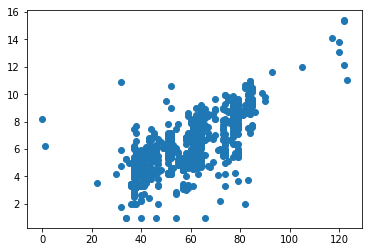

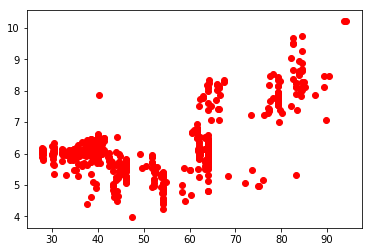

In [25]:
#plt.scatter(s1.full_sq,predicted, color='red')
plt.scatter(train_df[train_df.sub_area=='Poselenie Vnukovskoe'].full_sq, train_df[train_df.sub_area=='Poselenie Vnukovskoe'].price_doc)
plt.show()
plt.scatter(s1.full_sq,predicted, color='red')
plt.show()

(997, 8)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  if __name__ == '__main__':


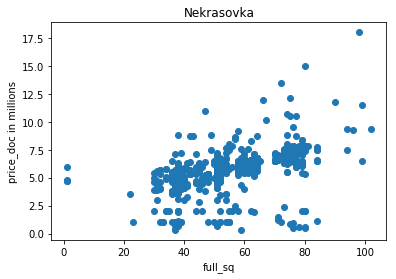

,price_doc,num_room,kitch_sq,build_year,full_sq,sub_area,railroad_station_walk_min,state
102,5.950000,NaN,NaN,NaN,44,Nekrasovka,29.260504,NaN
111,6.800000,NaN,NaN,NaN,54,Nekrasovka,29.260504,NaN
137,7.450000,NaN,NaN,NaN,55,Nekrasovka,29.260504,NaN
148,5.600000,NaN,NaN,NaN,31,Nekrasovka,29.260504,NaN
169,6.400000,NaN,NaN,NaN,42,Nekrasovka,29.260504,NaN
174,5.600000,NaN,NaN,NaN,44,Nekrasovka,29.260504,NaN
185,18.000000,NaN,NaN,NaN,98,Nekrasovka,29.260504,NaN
188,5.500000,NaN,NaN,NaN,38,Nekrasovka,29.260504,NaN
191,5.500000,NaN,NaN,NaN,45,Nekrasovka,29.260504,NaN
196,6.500000,NaN,NaN,NaN,36,Nekrasovka,29.260504,NaN


In [112]:
for fea in ['Nekrasovka']: #train_df.okrugs.unique():
    plot1=train_df[train_df.sub_area==fea]
    #plot1=plot1[(plot1.state.isnull()) & plot1.life_sq.isnull()]
    plot1=plot1[~((plot1.state.isnull()) & plot1.life_sq.isnull())]
    #plot3=plot1[~((plot1.state.isnull()) & plot1.life_sq.isnull())]
    #print (len(plot1), len(plot2), len(plot3))
    plot1=plot1[(plot1.sub_area==fea)][['price_doc','num_room','kitch_sq','build_year','full_sq','sub_area','railroad_station_walk_min','state']]
    plot1=plot1[(plot1.price_doc < 50) & (plot1.full_sq <120)]
    plot1.sortlevel()
    plt.scatter(list(plot1['full_sq']), list(plot1['price_doc']))
    plt.title(fea)
    plt.xlabel('full_sq')
    plt.ylabel('price_doc in millions')
    #plt.savefig(filename)
    print(plot1.shape)
    plt.show()
plot1[plot1.price_doc>5]

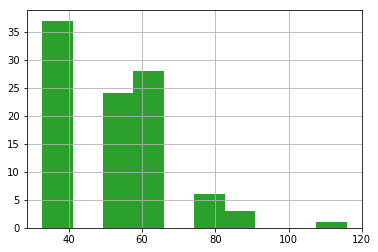

In [51]:
tmp1=test_df[test_df.sub_area=='Nekrasovka'];
tmp1.full_sq.hist()
plt.show()

In [43]:
plot1[plot1.price_doc>5]

,price_doc,num_room,kitch_sq,build_year,full_sq,sub_area,railroad_station_walk_min,state
102,5.950000,NaN,NaN,NaN,44,Nekrasovka,29.260504,NaN
111,6.800000,NaN,NaN,NaN,54,Nekrasovka,29.260504,NaN
137,7.450000,NaN,NaN,NaN,55,Nekrasovka,29.260504,NaN
148,5.600000,NaN,NaN,NaN,31,Nekrasovka,29.260504,NaN
169,6.400000,NaN,NaN,NaN,42,Nekrasovka,29.260504,NaN
174,5.600000,NaN,NaN,NaN,44,Nekrasovka,29.260504,NaN
185,18.000000,NaN,NaN,NaN,98,Nekrasovka,29.260504,NaN
188,5.500000,NaN,NaN,NaN,38,Nekrasovka,29.260504,NaN
191,5.500000,NaN,NaN,NaN,45,Nekrasovka,29.260504,NaN
196,6.500000,NaN,NaN,NaN,36,Nekrasovka,29.260504,NaN


In [37]:
%save -a class_ensemble.py 25 36

The following commands were written to file `class_ensemble.py`:
#plt.scatter(s1.full_sq,predicted, color='red')
plt.scatter(train_df[train_df.sub_area=='Poselenie Vnukovskoe'].full_sq, train_df[train_df.sub_area=='Poselenie Vnukovskoe'].price_doc)
plt.show()
plt.scatter(s1.full_sq,predicted, color='red')
plt.show()
for fea in ['Poselenie Sosenskoe']: #train_df.okrugs.unique():
    plot1=train_df[(train_df.sub_area==fea)][['price_doc','num_room','kitch_sq','build_year','full_sq','sub_area','railroad_station_walk_min','state']]
    #plot1=plot1[(plot1.price_doc < 80) & (plot1.full_sq <200)]
    plot1.sortlevel()
    plt.scatter(list(plot1['full_sq']), list(plot1['price_doc']))
    plt.title(fea)
    plt.xlabel('full_sq')
    plt.ylabel('price_doc in millions')
    #plt.savefig(filename)
    plt.show()
plot1[plot1.price_doc>5]


In [192]:
from sklearn import svm
class Poselenie_Sosenskoe():
    #_data = pd.DataFrame
    def __init__(self, train_rows):
        self.highcutoff = 250
        #self.train_target=train_rows.price_doc
        #train_rows=train_rows.drop(['price_doc','sub_area','product_type'],axis=1)
        #train_rows1=train_rows.iloc[:,2:20]
    
    
        #self.train=train_rows1
        
        
        s1=train_rows[train_rows.full_sq > self.highcutoff];
        sa=train_rows[train_rows.full_sq < self.highcutoff];
        s2=sa[(sa.state.isnull()) & (sa.life_sq.isnull())]
        s3a = sa[~((sa.state.isnull()) & (sa.life_sq.isnull()))]
        
        s3=s3a[s3a.price_doc>2.5]
        s4=s3a[s3a.price_doc <= 2.5]
        
        
        t1=s1.price_doc
        t2=s2.price_doc
        t3=s3.price_doc
        t4=s4.price_doc

        s1=s1.drop(['price_doc','sub_area','product_type'],axis=1)
        s1=s1.iloc[:,2:17]
        for fea in s1.columns:
                s1[fea].fillna(s1[fea].median(), inplace=True)
        for fea in s1.columns:
                s1[fea].fillna(0, inplace=True)

        s2=s2.drop(['price_doc','sub_area','product_type'],axis=1)
        s2=s2.iloc[:,2:17]
        for fea in s2.columns:
                s2[fea].fillna(s2[fea].median(), inplace=True)
        for fea in s2.columns:
                s2[fea].fillna(0, inplace=True)                
                
                
        s3=s3.drop(['price_doc','sub_area','product_type'],axis=1)
        s3=s3.iloc[:,2:17]
        for fea in s3.columns:
                s3[fea].fillna(s3[fea].median(), inplace=True)
        for fea in s3.columns:
                s3[fea].fillna(0, inplace=True)
        s4=s4.drop(['price_doc','sub_area','product_type'],axis=1)
        s4=s4.iloc[:,2:17]
        for fea in s4.columns:
                s4[fea].fillna(s4[fea].median(), inplace=True)
        for fea in s4.columns:
                s4[fea].fillna(0, inplace=True)
                
        d3=np.ones(len(t3))
        
        d4=np.ones(len(t4))*-1
        
        print ("s3 shape",s3.shape)
        X = pd.concat([s3,s4])
        y = np.concatenate([d3,d4],axis=0)
        #print (X)
        self.decision_clf = svm.SVC()
        self.decision_clf.fit(X, y)
        
        
        estimator2 = RandomForestRegressor(random_state=0, n_estimators=500, verbose=1)
        #print (type(estimator))
        estimator2.fit(s2, t2)
        self.estimator2=estimator2
        
        estimator3 = RandomForestRegressor(random_state=0, n_estimators=500, verbose=1)
        #print (type(estimator))
        estimator3.fit(s3, t3)
        self.estimator3=estimator3      
        

    def predict_price(self,test_row):
        print ('krishna')
        print (len(test_row))
        print (type(test_row))
        test_row=test_row.drop(['sub_area','product_type'],axis=1)

        test_row=test_row.iloc[:,2:17]
        for fea in test_row.columns:
            test_row[fea].fillna(test_row[fea].median(),inplace=True)
        for fea in test_row.columns:
            test_row[fea].fillna(0,inplace=True)
        dum=test_row.iloc[0]['full_sq']
        #print (dum)
        if dum > 250:
            predicted_price=5
        else:
            #if test_row[(test_row.state.isnull()) & (test_row.life_sq.isnull())]:
            #print ((test_row.state.isnull().iloc[0]))
            
            
            if ((test_row.state.isnull()) & (test_row.life_sq.isnull())).iloc[0]:
                 predicted_price= self.estimator2.predict(test_df)
            else:
                pclass=self.decision_clf.predict(test_row)
                print (pclass)
                if pclass==-1:
                       predicted_price= 2.5
                else:                        
                       predicted_price= self.estimator3.predict(test_row)
        #if test_row[2]< 35:
        #    predicted_price=predicted_price-1
        return predicted_price[0]
            


s1 = test_df[test_df.sub_area=='Poselenie Sosenskoe']

a1=Poselenie_Sosenskoe(train_df[train_df.sub_area=='Poselenie Sosenskoe'])
#print (s1)
#Poselenie_Vnukovskoe.predict_price(s1)
predicted=[]
for pos, row in s1.iterrows():
   
    
    y=a1.predict_price(s1.loc[pos:pos+1])
    predicted.append(y)
print (predicted)

s3 shape (862, 15)


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.9s finished


krishna
1
<class 'pandas.core.frame.DataFrame'>
[ 1.]
krishna
1
<class 'pandas.core.frame.DataFrame'>
[ 1.]


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


krishna
1
<class 'pandas.core.frame.DataFrame'>
[ 1.]
krishna
1
<class 'pandas.core.frame.DataFrame'>
[ 1.]
krishna
1
<class 'pandas.core.frame.DataFrame'>
[ 1.]
krishna
1
<class 'pandas.core.frame.DataFrame'>
[ 1.]
krishna
1
<class 'pandas.core.frame.DataFrame'>
[ 1.]
krishna

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished



1
<class 'pandas.core.frame.DataFrame'>
[ 1.]
krishna
1
<class 'pandas.core.frame.DataFrame'>
[ 1.]
krishna
1
<class 'pandas.core.frame.DataFrame'>
[ 1.]
krishna
1
<class 'pandas.core.frame.DataFrame'>
[ 1.]
krishna
1
<class 'pandas.core.frame.DataFrame'>
[ 1.]
krishna
1
<class 'pandas.core.frame.DataFrame'>
[ 1.]
krishna
1
<class 'pandas.core.frame.DataFrame'>
[ 1.]


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


krishna
1
<class 'pandas.core.frame.DataFrame'>
[ 1.]
krishna
1
<class 'pandas.core.frame.DataFrame'>
[ 1.]
krishna
1
<class 'pandas.core.frame.DataFrame'>
[ 1.]
krishna
1
<class 'pandas.core.frame.DataFrame'>
[ 1.]
krishna
1
<class 'pandas.core.frame.DataFrame'>
[ 1.]
krishna
1
<class 'pandas.core.frame.DataFrame'>
[ 1.]
krishna

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished



1
<class 'pandas.core.frame.DataFrame'>
[ 1.]
krishna
1
<class 'pandas.core.frame.DataFrame'>
[ 1.]
krishna
1
<class 'pandas.core.frame.DataFrame'>
[ 1.]
krishna
1
<class 'pandas.core.frame.DataFrame'>
[ 1.]
krishna
1
<class 'pandas.core.frame.DataFrame'>
[ 1.]
krishna
1
<class 'pandas.core.frame.DataFrame'>
[ 1.]
krishna
1
<class 'pandas.core.frame.DataFrame'>
[ 1.]
krishna
1


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


<class 'pandas.core.frame.DataFrame'>
[ 1.]
krishna
1
<class 'pandas.core.frame.DataFrame'>
[ 1.]
krishna
1
<class 'pandas.core.frame.DataFrame'>
[ 1.]
krishna
1
<class 'pandas.core.frame.DataFrame'>
[ 1.]
krishna
1
<class 'pandas.core.frame.DataFrame'>
[ 1.]
krishna
1
<class 'pandas.core.frame.DataFrame'>
[ 1.]
krishna
1
<class 'pandas.core.frame.DataFrame'>
[ 1.]


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


krishna
1
<class 'pandas.core.frame.DataFrame'>
[ 1.]
krishna
1
<class 'pandas.core.frame.DataFrame'>
[ 1.]
krishna
1
<class 'pandas.core.frame.DataFrame'>
[ 1.]
krishna
1
<class 'pandas.core.frame.DataFrame'>
[ 1.]
krishna
1
<class 'pandas.core.frame.DataFrame'>
[ 1.]
krishna
1
<class 'pandas.core.frame.DataFrame'>
[ 1.]
krishna
1
<class 'pandas.core.frame.DataFrame'>
[ 1.]
krishna
1
<class 'pandas.core.frame.DataFrame'>
[ 1.]
krishna
2
<class 'pandas.core.frame.DataFrame'>
[ 1.  1.]


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [131]:
df=test_df.copy()
#df=df[:,2:17]
df[df['full_sq'].str.contains("8,2517")]
#mask = np.column_stack([df[col]contains("8,2517") for col in df])
#df.loc[mask.any(axis=1)]

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [138]:
df=train_df.copy()
df=df.iloc[:,2:17]
for col in df:
    print (col,"\t",type(df[col][0]))

full_sq 	 <class 'numpy.int64'>
life_sq 	 <class 'numpy.float64'>
floor 	 <class 'numpy.float64'>
max_floor 	 <class 'numpy.float64'>
material 	 <class 'numpy.float64'>
build_year 	 <class 'numpy.float64'>
num_room 	 <class 'numpy.float64'>
kitch_sq 	 <class 'numpy.float64'>
state 	 <class 'numpy.float64'>
product_type 	 <class 'str'>
sub_area 	 <class 'str'>
area_m 	 <class 'numpy.float64'>
raion_popul 	 <class 'numpy.float64'>
green_zone_part 	 <class 'numpy.float64'>
indust_part 	 <class 'numpy.float64'>


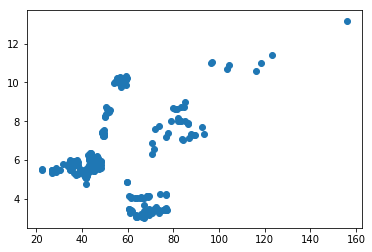

In [100]:
plt.scatter(s1.full_sq,predicted)
plt.show()

In [101]:
len(predicted)

297

In [102]:
len(s1)

297

In [118]:
np.ones(5)*-1


array([-1., -1., -1., -1., -1.])

In [120]:
np.concatenate([np.ones(5)*-1, np.ones(5)], axis=0)


array([-1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.])